Вопросы по заданию
В этом разделе можно задать вопросы и получить ответ.
Преподаватель: Юлия Пономарева, Егор Шишковец

Задание<br>
Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.<br>
Описание задания:<br>
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с https://www.cs.toronto.edu/~delve/data/adult/desc.html.<br>
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html.<br>
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.<br>
Этапы работы:<br>
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)<br>
Проведите первичный анализ.<br>
Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками<br>
Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
Преобразуйте категориальные признаки.<br>
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.<br>
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.<br>
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
Сформулируйте выводы по проделанной работе.<br>
Кратко опишите какие преобразования были сделаны с данными.<br>
Сравните точность двух моделей.<br>
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации, сделан вывод о целесообразности их применения к данным.<br>
Форма выполнения: ссылка на Jupyter Notebook, загруженный на GitHub; ссылка на Google Colab; файл с расширением .ipynb.<br>
Инструменты: Jupyter Notebook/Google Colab; GitHub.<br>
Срок выполнения: 7 календарных дней<br>
<br>
*Рекомендации к выполнению:<br>
Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.<br>
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читаемость.<br>
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.<br>
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска<br>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# импортирую данные
df = pd.read_csv('../2.1. Практика и ДЗ/adult.csv', na_values='?') # известно, что пропущенные значения обозначаются "?", поэтому сразу конвертирую их в НаН
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# смотрю данные
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# проверяю пропущенные данные
df.isna().sum()
# прежде чем чистить, выберу только те колонки, которые будут использоваться в модели

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
# для того, чтобы не усложнять тренировочные данные оставляю для модели следующие поля
df1 = df[['workclass','education','gender','native-country','income']]

In [6]:
# смотрим пропуски
df1.isna().sum()

workclass         2799
education            0
gender               0
native-country     857
income               0
dtype: int64

In [7]:
#чистим от пропусков
df2 = df1.dropna()
df2.isna().sum()

workclass         0
education         0
gender            0
native-country    0
income            0
dtype: int64

In [8]:
df2.head()

,workclass,education,gender,native-country,income
0,Private,11th,Male,United-States,<=50K
1,Private,HS-grad,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Male,United-States,>50K
3,Private,Some-college,Male,United-States,>50K
5,Private,10th,Male,United-States,<=50K


/tmp/ipykernel_20781/2079010599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,'count'] = 1


<BarContainer object of 8 artists>

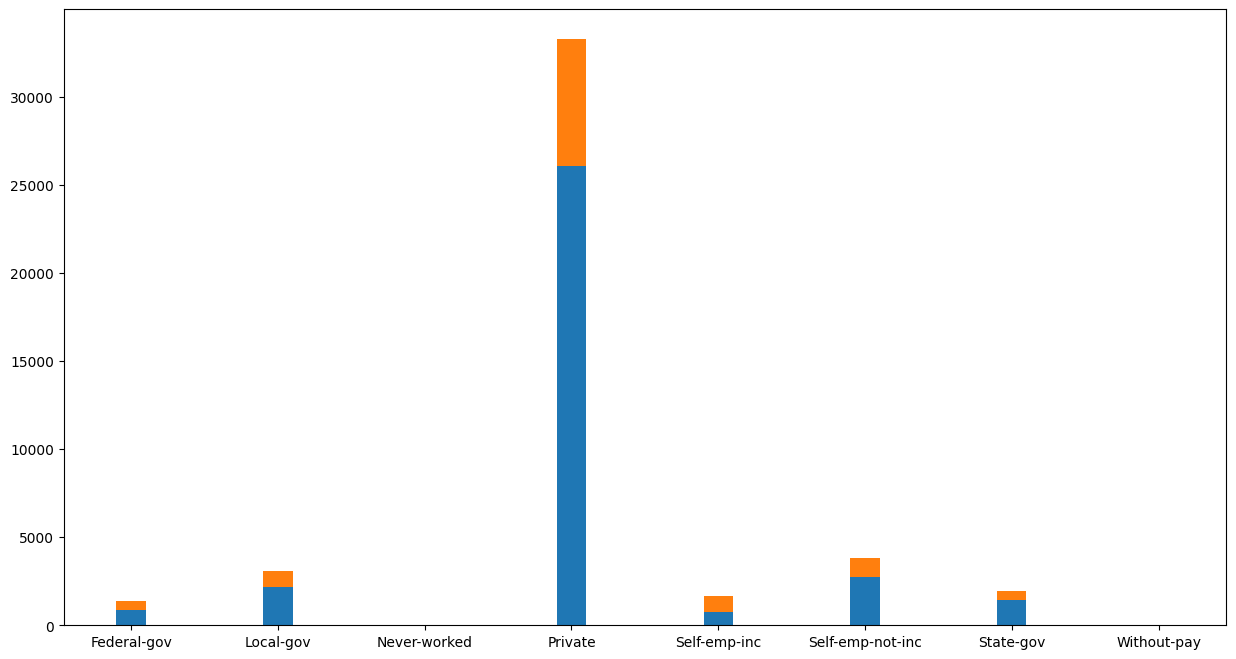

In [9]:
# строю график распределения доходов по области деятельности
df2.loc[:,'count'] = 1
df2p = df2[['workclass', 'income', 'count']].pivot_table(index=['workclass'], columns=['income'], aggfunc='count').reset_index()
w_class = df2p['workclass']
less_50K = df2p['count']['<=50K']
more_50K = df2p['count']['>50K']

plt.figure(1, figsize=(15,8))
plt.bar(w_class, less_50K, 0.2)
plt.bar(w_class, more_50K, 0.2, bottom=less_50K)

In [10]:
# убираю лишнюю колонку и создаю копию датафрейма для построения модели
df3 = df2.drop(columns='count')
df3.head()

,workclass,education,gender,native-country,income
0,Private,11th,Male,United-States,<=50K
1,Private,HS-grad,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Male,United-States,>50K
3,Private,Some-college,Male,United-States,>50K
5,Private,10th,Male,United-States,<=50K


In [11]:
# делю данные на X и y
X = df3.drop(columns=['income']) # убираю целевое значение
X = pd.get_dummies(X, columns=['workclass', 'education', 'gender', 'native-country'], drop_first=False) # преобразую категориальные переменные
X

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# преобразую целевую переменную
y = df3['income']
from sklearn.preprocessing import LabelEncoder # импортирую класс для преобразования переменных
le = LabelEncoder()
le.fit(y)
# le.classes_ # просмотр преобразуемых переменных
y = le.transform(y) # преобразую данные
y

array([0, 0, 1, ..., 0, 0, 1])

In [13]:
# делю данные
from sklearn.model_selection import train_test_split  # импортирую класс
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# обучаю модель 1
from sklearn.linear_model import LogisticRegression # импортирую модель
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)
predictions1

array([0, 0, 0, ..., 0, 1, 0])

In [15]:
# смотрю точность первой модели
model1.score(X_train, y_train)

0.7808207820920271

In [16]:
# обучаю модель 2
from sklearn.svm import SVC
model2 = SVC(kernel='poly')
model2.fit(X_train, y_train)

SVC(kernel='poly')

In [17]:
model2.score(X_train, y_train) 

0.7877020864999309

Точность обеих моделей почти идентичная. Можно попробовать применить масштабирование данных.

In [18]:
from sklearn.pipeline import make_pipeline # импортирую пайплайны
from sklearn.preprocessing import StandardScaler # импортирую масштабирование данных

# обучаю модели 3 и 4 на лог. регрессии и SVM, используя масштабирование данных
model3 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model3.fit(X_train, y_train)
model4 = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly')
)
model4.fit(X_train, y_train)

# смотрю точность моделей 3 и 4
print(model3.score(X_train, y_train), model4.score(X_train, y_train))

0.7807378748100041 0.7864308415089125


Точность почти не изменилась. Для дальнейшего увеличения точности можно добавить дополнительные параметры в модель.
С точностью предсказания в 78% все варианты моделей могут быть использованы для практического применения.

In [19]:
# Для эксперимента пробую разные ядра.
# model4_1 = make_pipeline(
#     StandardScaler(),
#     SVC(kernel='rbf')
# )
# model4_1.fit(X_train, y_train)

# model4_2 = make_pipeline(
#     StandardScaler(),
#     SVC(kernel='linear')
# )
# model4_2.fit(X_train, y_train)

# model4_3 = make_pipeline(
#     StandardScaler(),
#     SVC(kernel='sigmoid')
# )
# model4_3.fit(X_train, y_train)

# model4_4 = make_pipeline(
#     StandardScaler(),
#     SVC(kernel='precomputed')
# )
# model4_4.fit(X_train, y_train)

# print(model4_1.score(X_train, y_train), model4_2.score(X_train, y_train), model4_3.score(X_train, y_train), model4_4.score(X_train, y_train))